In [1]:
import pandas as pd
training_data = pd.read_csv('twitter_training.csv', header=None)
validation_data = pd.read_csv('twitter_validation.csv', header=None)
training_data.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# Check the number of columns
print(f'Training data has {training_data.shape[1]} columns.')
print(f'Validation data has {validation_data.shape[1]} columns.')

# Display the first few rows of the training data to inspect the structure
print(training_data.head())


Training data has 4 columns.
Validation data has 4 columns.
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [4]:
# If there are 4 columns, we can rename them as follows:
if training_data.shape[1] == 4:
    training_data.columns = ['label', 'id', 'user', 'text']
    validation_data.columns = ['label', 'id', 'user', 'text']
else:
    print("Unexpected number of columns. Please inspect the data structure.")

# Display the first few rows of the cleaned data
print(training_data.head())


   label           id      user  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


sentiment
Neutral     6
Positive    6
Name: count, dtype: int64


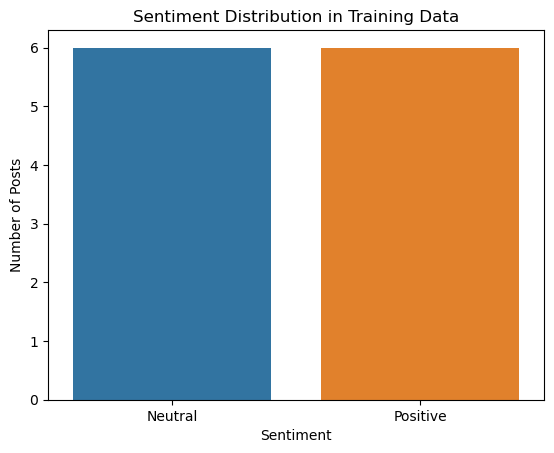

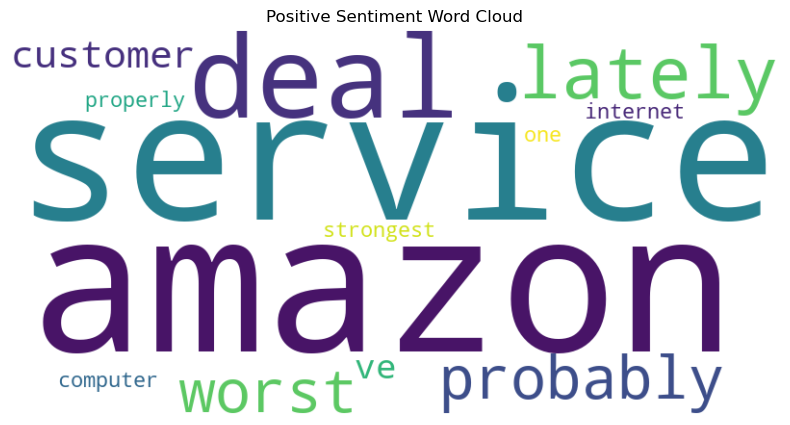

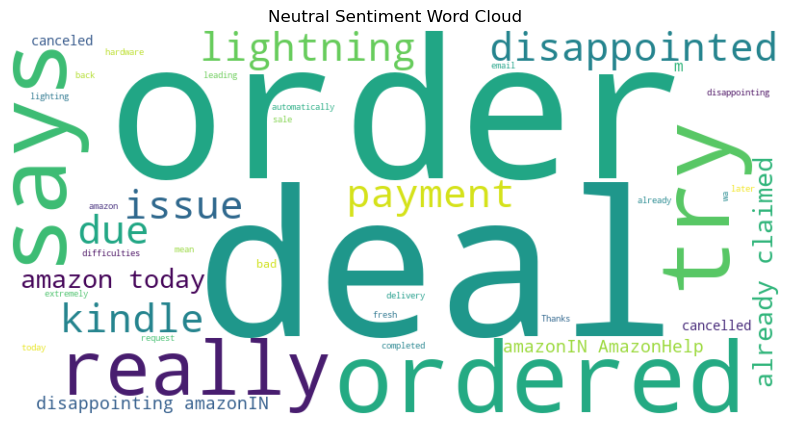

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [14]:
# Assuming the label column provides sentiment information (e.g., 0 = negative, 2 = neutral, 4 = positive)
sentiment_mapping = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}
training_data['sentiment'] = training_data['label'].map(sentiment_mapping)
validation_data['sentiment'] = validation_data['label'].map(sentiment_mapping)

# Check the distribution of sentiments
print(training_data['sentiment'].value_counts())

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(x='sentiment', data=training_data)
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

# Word cloud for each sentiment
from wordcloud import WordCloud

# Function to generate word cloud for a given sentiment
def generate_wordcloud(sentiment):
    text = ' '.join(training_data[training_data['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    generate_wordcloud(sentiment)
